In [1]:
from lbm.datasets.housing_locations import Preprocessor
import pandas as pd

processor = Preprocessor(include_all_labels=True)
train_loader, val_loader, test_loader = processor.get_loaders()

feature_names = processor.get_feature_names()
label_names = processor.get_label_names()

df1 = pd.DataFrame(columns=feature_names)
df2 = pd.DataFrame(columns=label_names)
for X, Y in train_loader:
    for x in X:
        df1.loc[len(df1)] = x.numpy()
    for y in Y:
        df2.loc[len(df2)] = y.numpy()
display(df1)
display(df2)

,latitude,longitude
0,37.680000,-122.470001
1,33.919998,-118.169998
2,36.389999,-119.309998
3,34.070000,-118.250000
4,33.630001,-117.709999
...,...,...
16341,37.279999,-121.849998
16342,33.910000,-118.169998
16343,33.900002,-118.160004
16344,33.849998,-117.910004


,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
16341,1.0,0.0,0.0,0.0,0.0
16342,1.0,0.0,0.0,0.0,0.0
16343,1.0,0.0,0.0,0.0,0.0
16344,1.0,0.0,0.0,0.0,0.0


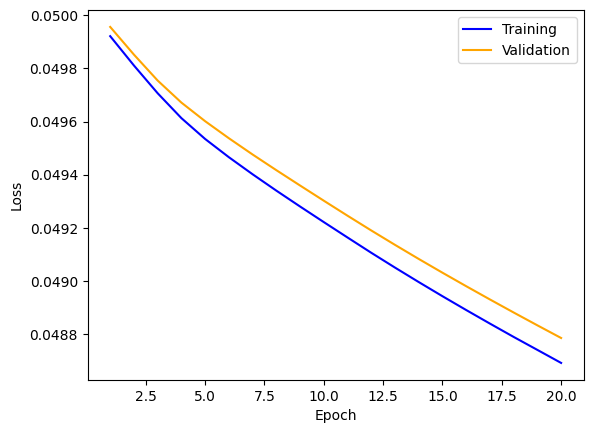

In [6]:
from lbm.models import MLPClassifier
from lbm.workflow import train_and_validate
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn
import numpy as np

means, stds = processor.get_z_score()
model = MLPClassifier(
    len(feature_names),
    [len(feature_names)], 
    len(label_names), 
    means,
    stds
)

optimizer = optim.SGD(model.parameters(), weight_decay=0.01)
loss_fn = nn.CrossEntropyLoss()
train_losses, val_losses = train_and_validate(
    model,
    train_loader,
    val_loader,
    optimizer,
    loss_fn,
    epochs=20
)
plt.plot(np.arange(1, len(train_losses) + 1), train_losses, label='Training', color='blue')
plt.plot(np.arange(1, len(val_losses) + 1), val_losses, label='Validation', color='orange')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [8]:
from lbm.workflow import avg_accuracy

accuracy = avg_accuracy(model, val_loader)
print(f'Accuracy: {accuracy:.2%}')



Accuracy: 43.47%
